In [13]:
import numpy as np
import numba
from numba.types import *
from numba import prange
import matplotlib.pyplot as plt
from numpy.linalg import eig, multi_dot, inv, matrix_power, eigh
from scipy.optimize import curve_fit
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size']=20
from scipy.linalg import expm, sqrtm
from scipy.stats import linregress
from math import acos, factorial
from scipy.special import eval_genlaguerre, gamma, hyp1f1

In [14]:
#N=10 #Dimension of the Hilbert Space
#S=5
dim=10
A=1 #Probability distribution will be P~exp(-A x^2)
sigma=np.sqrt(A/2)
#t_max=0.5
#n_points_t=50
#t_arr=np.linspace(0, t_max, n_points_t)
basis = np.identity(dim)
i=complex(0,1)
β=0
#tmax=np.log(dim)/(2*np.pi/β)*2
tmax=100
n_points_t=300
xlogscale=True
if xlogscale:
    auxtmin=-1.5
    auxtmax=np.log10(tmax)
    auxt=np.linspace(auxtmin, auxtmax, n_points_t)
    t_arr=10**(auxt)
else:
    t_arr=np.linspace(0, tmax, n_points_t)
Nav=500
hbar=1

In [15]:
def avZGUE(sigma, dim):
    return np.exp(sigma**2/4)*eval_genlaguerre(dim-1, 1, -sigma**2/2)
    #return np.exp(sigma**2/4)*GenLag(dim-1, 1, -sigma**2/2)
def gcGUE(sigma0, dim):
    gc=0
    for n in range(dim):
        for m in range(dim):
            cmn=factorial(np.min([n,m]))/factorial(np.max([n, m]))
            dnm=np.abs(n-m)
            minnm=np.min([n,m])
            poly=eval_genlaguerre(minnm, dnm, -sigma0**2/2)
            #poly=GenLag(dim-1, 1, -sigma0**2/2)
            gc+=cmn*(np.conjugate(sigma0)*sigma0/2)**dnm*np.conjugate(poly)*poly
            #psimn=hyp1f1(-m, 1+m-n, -sigma**2/2)/gamma(1+m-n)
            #gc+=(sigma/np.conjugate(sigma))**(m-n)*np.conjugate(psimn)*psimn
    return -np.exp((sigma0**2+(np.conjugate(sigma0))**2)/4)*gc
    #return np.exp((sigma0**2+(np.conjugate(sigma0))**2)/4)*gc
def avgGUE(beta, t, dim):
    term1=avZGUE(2*beta, dim)
    term2=avZGUE(beta+i*t, dim)
    #term2=(np.abs(term2))**2
    term2=np.conjugate(term2)*term2
    term3=gcGUE(beta+i*t, dim)
    return term1+term2+term3
if xlogscale:
    t=np.linspace(10**auxtmin, tmax, 10000)
else:
    t=np.linspace(0, tmax, 10000)

In [16]:
total=avgGUE(β, t, dim)
term1=avZGUE(2*β, dim)*np.ones(10000)
term2=avZGUE(β+i*t, dim)
term2=np.conjugate(term2)*term2
term3=gcGUE(β+i*t, dim)

/home/pablo/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pablo/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pablo/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


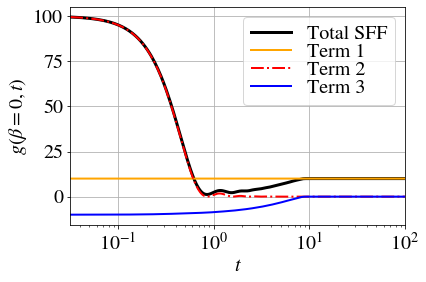

In [26]:
plt.figure()
plt.plot(t, total, label='Total SFF', color='black', lw=3)
plt.plot(t, term1, label='Term 1', color='orange', lw=2)
plt.plot(t, term2, label='Term 2', ls='-.', color='red', lw=2)
#plt.plot(t, (1 - dim*0.5*t**2+(t**2/2)**2*(5*dim**2-1)/12)*dim**2, label='$o(t^4)$ approx.', ls='--')
#plt.plot(t, dim**2*(1 - ((dim-1)**2/4)*(t**2/2)**2 - (dim -1)*(t**2/2))*np.exp(-t**2/2))
#plt.plot(t, np.exp(-dim*t**2/2)*dim**2, label=r"$e^{- N t^2/2}$", ls='--')
#plt.plot(t, np.exp(-(dim+3)*(t-0.5)), label=r"$e^{- N (t-t^*)}$", ls=':', lw=3)
#plt.plot(t, (dim**2 - 0.5*np.exp(dim*(t))))
#plt.plot(t, aux)
#plt.plot(t, aux2, ls='--')
plt.plot(t, term3, label='Term 3', color='blue', lw=2)
plt.xscale('log')
plt.grid()
plt.xlim(t[0], t[-1])
#plt.yscale('log')
#plt.ylim(1e-1, dim**2)
plt.xlabel("$t$")
plt.ylabel(r"$g(\beta=0, t)$")
plt.legend(labelspacing=0)
plt.show()